In [43]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path


# === 1. Définir la racine du projet (répertoire parent du script)

base_dir = Path().resolve().parent
# === 2. Définir les sous-dossiers
src_dir = base_dir / "src"
inputs_dir = base_dir / "data"
outputs_dir = base_dir / "outputs"
notebooks_dir = base_dir / "notebooks"


# === 3. Créer les dossiers s’ils n’existent pas
for folder in [src_dir, inputs_dir, outputs_dir,notebooks_dir]:
    sys.path.append(str(folder))  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

songs_raw_path = outputs_dir / "songs_metadata.csv"
songs_dedup_path = outputs_dir / "songs_metadata_dedup.csv"
# Charger les deux datasets
songs_raw = pd.read_csv(songs_raw_path, index_col=0)
songs_dedup = pd.read_csv(songs_dedup_path, index_col=0)

print(f"songs_raw : {songs_raw.shape}")
print(f"songs_dedup : {songs_dedup.shape}")


songs_raw : (232724, 4)
songs_dedup : (158368, 5)


In [45]:
dups_raw = songs_raw.duplicated(subset=['title', 'artist']).sum()
print(f"Doublons (raw) (title + artist) : {dups_raw}")


Doublons (raw) (title + artist) : 56211


In [46]:
# Vérifier doublons version dédupliquée
dups_dedup = songs_dedup.duplicated(subset=['title', 'artist']).sum()
print(f"Doublons (dedup) (title + artist) : {dups_dedup}")


Doublons (dedup) (title + artist) : 0


In [47]:
print("NA (raw) :", songs_raw.isnull().sum())


NA (raw) : title           0
artist          0
genre           0
duration_sec    0
dtype: int64


In [48]:
print("NA (dedup) :", songs_dedup.isnull().sum())

NA (dedup) : track_id        0
title           0
artist          0
genre           0
duration_sec    0
dtype: int64


In [49]:
# Distribution des genres (dedup)
genre_counts = songs_dedup['genre'].value_counts()
print("\nTop genres :\n", genre_counts)


Top genres :
 genre
Electronic     9094
Alternative    9092
Anime          8915
Reggae         8667
Reggaeton      8517
Soundtrack     8410
Blues          8380
Folk           8029
Classical      8020
Opera          8006
Ska            8003
Dance          7992
Jazz           7839
World          7765
Movie          7627
Hip-Hop        7407
Country        7381
R&B            5311
Soul           4408
Indie          3310
Pop            2409
Rock           2213
Rap            1454
A Capella       119
Name: count, dtype: int64


In [50]:
"""genres_to_exclude = ["Comedy", "Children's Music", "Children’s Music"]

songs_dedup_clean = songs_dedup[~songs_dedup['genre'].isin(genres_to_exclude)]
print(f"Avant filtre : {songs_dedup.shape}")
print(f"Après filtre : {songs_dedup_clean.shape}")"""


'genres_to_exclude = ["Comedy", "Children\'s Music", "Children’s Music"]\n\nsongs_dedup_clean = songs_dedup[~songs_dedup[\'genre\'].isin(genres_to_exclude)]\nprint(f"Avant filtre : {songs_dedup.shape}")\nprint(f"Après filtre : {songs_dedup_clean.shape}")'


Top genres :
 genre
Electronic     9094
Alternative    9092
Anime          8915
Reggae         8667
Reggaeton      8517
Soundtrack     8410
Blues          8380
Folk           8029
Classical      8020
Opera          8006
Name: count, dtype: int64


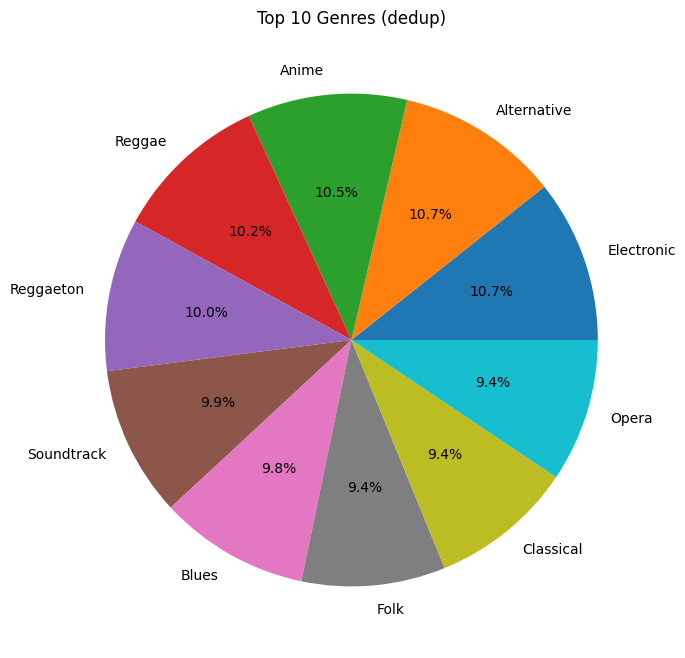

In [51]:
# Distribution des genres (dedup)
genre_counts = songs_dedup['genre'].value_counts()
print("\nTop genres :\n", genre_counts.head(10))

plt.figure(figsize=(8,8))
genre_counts.head(10).plot.pie(autopct='%1.1f%%')
plt.title("Top 10 Genres (dedup)")
plt.ylabel("")
plt.show()


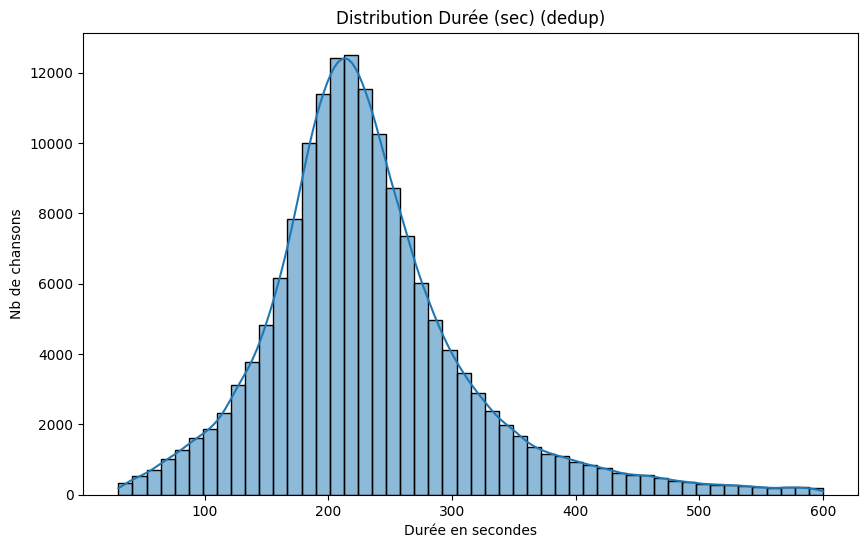

In [52]:
# Histogramme des durées (dedup)
plt.figure(figsize=(10,6))
sns.histplot(songs_dedup['duration_sec'], bins=50, kde=True)
plt.title("Distribution Durée (sec) (dedup)")
plt.xlabel("Durée en secondes")
plt.ylabel("Nb de chansons")
plt.show()

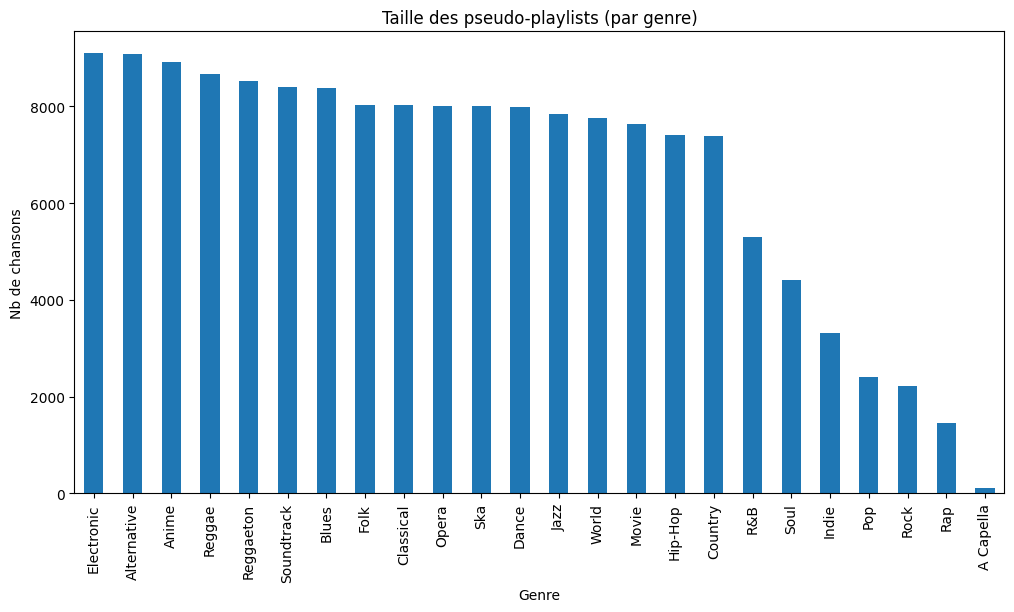

In [53]:
# Taille des pseudo-playlists par genre (dedup)
pseudo_playlist_sizes = songs_dedup.groupby('genre').size()
plt.figure(figsize=(12,6))
pseudo_playlist_sizes.sort_values(ascending=False).plot(kind='bar')
plt.title("Taille des pseudo-playlists (par genre)")
plt.xlabel("Genre")
plt.ylabel("Nb de chansons")
plt.show()

<!--
 Copyright 2025 beedi.goua_square-ma
 
 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at
 
     https://www.apache.org/licenses/LICENSE-2.0
 
 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.
-->



In [54]:

# Filtrer durée normale
songs_dedup_clean = songs_dedup[
    (songs_dedup['duration_sec'] >= 30) & 
    (songs_dedup['duration_sec'] <= 600)
]

print(f"Shape après filtrage : {songs_dedup_clean.shape}")



Shape après filtrage : (158368, 5)


Dans l’industrie musicale, il est courant de considérer qu’une piste de moins de 30 secondes n’est pas un morceau complet, mais plutôt une intro, un interlude ou un échantillon sonore.

À l’inverse, une durée supérieure à 10 minutes dépasse la longueur typique d’une chanson « radio » standard, et correspond souvent à un mix, un live ou une version étendue, ce qui peut biaiser la recommandation.

Limiter la durée entre 30 secondes et 10 minutes permet donc de ne conserver que des morceaux musicaux, complets et pertinents, adaptés à un moteur de recommandation grand public.

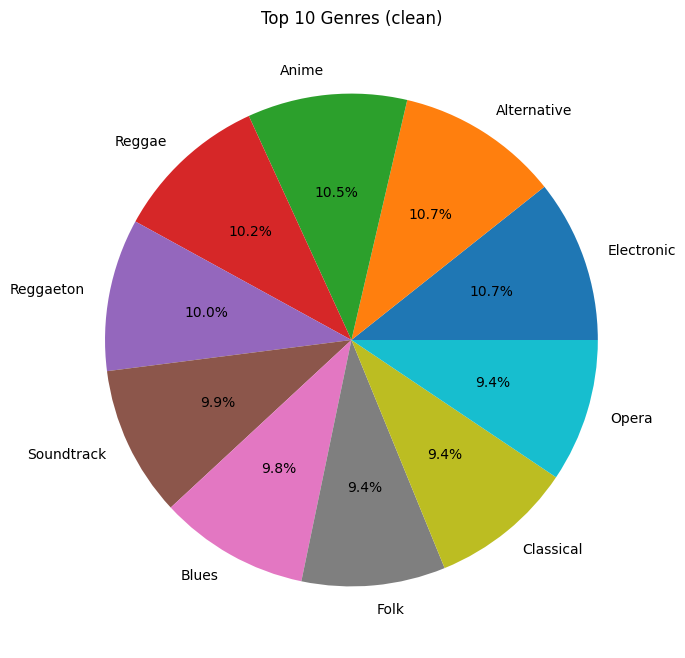

In [55]:
# Vérifier nouveau pie chart
new_genre_counts = songs_dedup_clean['genre'].value_counts().head(10)
new_genre_counts.plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title("Top 10 Genres (clean)")
plt.ylabel("")
plt.show()



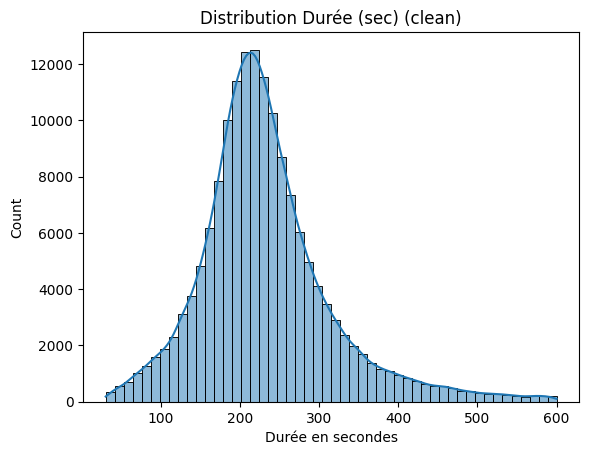

In [56]:
# Vérifier histogramme durée
sns.histplot(songs_dedup_clean['duration_sec'], bins=50, kde=True)
plt.title("Distribution Durée (sec) (clean)")
plt.xlabel("Durée en secondes")
plt.show()

In [57]:
songs_dedup_clean

track_id                             title  \
dedup_id                                                             
0         0BRjO6ga9RKCKjfDqeFgWV       C'est beau de faire un Show   
1         0BjC1NfoEOOusryehmNudP  Perdu d'avance (par Gad Elmaleh)   
2         0CoSDzoNIKCRs124s9uTVy    Don't Let Me Be Lonely Tonight   
3         0Gc6TVm52BwZD07Ki6tIvf    Dis-moi Monsieur Gordon Cooper   
4         0IuslXpMROHdEPvSl1fTQK                         Ouverture   
...                          ...                               ...   
176508    2XoAEpBuM4AtQIQYUEowRy                 They Like It Slow   
176509    1U0OMWvR89Cm20vCNar50f            Quickly (feat. Brandy)   
176510    2gGqKJWfWbToha2YmDxnnj                            P.O.P.   
176511    1qWZdkBl4UVPj9lK6HuuFM                      Burning Fire   
176512    34XO9RwPMKjbvRry54QzWn    You Don't Have To Hurt No More   

                            artist  genre  duration_sec  
dedup_id                                                 
0                   Henri Salvador  Movie        99.373  
1                Martin & les fées  Movie       137.373  
2                  Joseph Williams  Movie       170.267  
3                   Henri Salvador  Movie       152.427  
4                     Fabien Nataf  Movie        82.625  
...                            ...    ...           ...  
176508                      H-Town   Soul       279.510  
176509                 John Legend   Soul       222.667  
176510                       Belly   Soul       201.173  
176511    Jr Thomas & The Volcanos   Soul       282.447  
176512              Mint Condition   Soul       323.027  

[158368 rows x 5 columns]

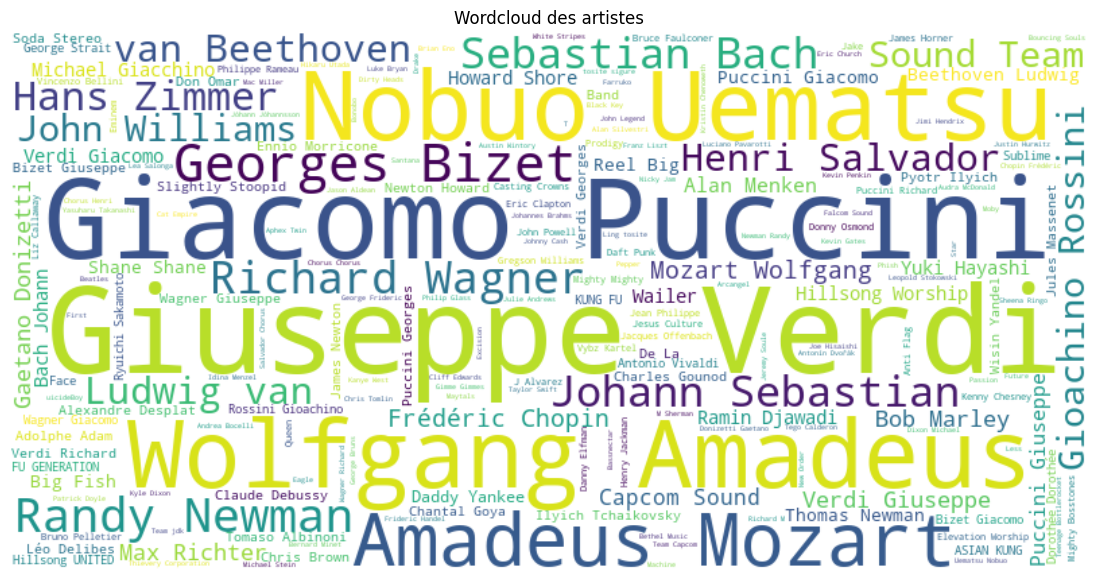

In [58]:
# Wordcloud artistes (dedup)
artist_text = " ".join(songs_dedup_clean['artist'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(artist_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud des artistes")
plt.show()


In [59]:
songs_dedup_clean.to_csv(outputs_dir /"songs_metadata_dedup.csv", index=True)
print("songs_metadata_dedup.csv sauvegardé.")


songs_metadata_dedup.csv sauvegardé.


In [60]:
import pickle

grouped_playlists = {
    genre: group[['track_id', 'title', 'artist']].to_dict(orient='records')
    for genre, group in songs_dedup_clean.groupby('genre')
}





In [61]:
grouped_playlists 

{'A Capella': [{'track_id': '0PuWvFJqZPJAxZNrFgw8xL',
   'title': 'For the Longest Time',
   'artist': 'MC6 A Cappella'},
  {'track_id': '1iXJKuzDH0E6PnTk2lQXAq',
   'title': 'Clair',
   'artist': 'The Singers Unlimited'},
  {'track_id': '3XxwdU13609bTGaAFRg3PA',
   'title': 'Come Go With Me',
   'artist': 'MC6 A Cappella'},
  {'track_id': '0crWDkAajRTnsGuZ6CAU85',
   'title': 'The Lion Sleeps Tonight',
   'artist': 'MC6 A Cappella'},
  {'track_id': '6TK4I15u1oym5H2eETng4F',
   'title': 'A Debtor to Mercy Alone',
   'artist': 'Glad'},
  {'track_id': '0PCgsZKSCmsDlHBXRTdejp',
   'title': 'O Wondrous Love',
   'artist': 'Glad'},
  {'track_id': '54eOtB9Vz0nli6U5Ez00ep',
   'title': 'Blue Moon',
   'artist': 'MC6 A Cappella'},
  {'track_id': '6iAU2N1jJqY9qUGvBTHtWa',
   'title': 'Runaround Sue',
   'artist': 'MC6 A Cappella'},
  {'track_id': '5FeU992vNw1J8j8aEw7vcR',
   'title': 'Teenager in Love',
   'artist': 'MC6 A Cappella'},
  {'track_id': '6kYfnFjxQYx2WkBW5jIiiI',
   'title': 'Sherry

In [62]:

with open(outputs_dir /"clean_playlists_filtered.pkl", "wb") as f:
    pickle.dump(grouped_playlists, f)

